<a href="https://colab.research.google.com/github/apriarami789/Capstone_file/blob/main/Colab_praprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
data1 = pd.read_csv('April sleep data - Sheet1.csv',parse_dates=['DATE'])
data1.head(6)

,APRIL,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
0,Friday,2022-04-01,90,7:22:00,18.00%,21.00%,98.00%,9:49pm - 6:01am
1,Saturday,2022-04-02,89,8:40:00,21.00%,21.00%,73.00%,9:50pm - 7:26am
2,Sunday,2022-04-03,81,8:52:00,21.00%,17.00%,26.00%,11:29pm - 9:54am
3,Monday,2022-04-04,83,6:50:00,17.00%,19.00%,99.00%,10:12pm - 5:49am
4,Tuesday,2022-04-05,84,6:57:00,18.00%,21.00%,97.00%,9:45pm - 5:43am
5,Wednesday,2022-04-06,83,7:27:00,17.00%,19.00%,77.00%,9:22pm - 6:14am


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   APRIL                     30 non-null     object        
 1   DATE                      30 non-null     datetime64[ns]
 2   SLEEP SCORE               30 non-null     int64         
 3   HOURS OF SLEEP            30 non-null     object        
 4   REM SLEEP                 30 non-null     object        
 5   DEEP SLEEP                30 non-null     object        
 6   HEART RATE BELOW RESTING  30 non-null     object        
 7   SLEEP TIME                30 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 2.0+ KB


In [ ]:
# prompt: hapus titik dan logo persen di kolom REM sleep dan deep sleep

data1['REM SLEEP'] = data1['REM SLEEP'].str.replace('.', '', regex=False).str.replace('%', '', regex=False)
data1['DEEP SLEEP'] = data1['DEEP SLEEP'].str.replace('.', '', regex=False).str.replace('%', '', regex=False)
data1['HEART RATE BELOW RESTING'] = data1['HEART RATE BELOW RESTING'].str.replace('.', '', regex=False).str.replace('%', '', regex=False)

data1['REM SLEEP'] = data1['REM SLEEP'].astype(float).apply(lambda x: x/100)
data1['DEEP SLEEP'] = data1['DEEP SLEEP'].astype(float).apply(lambda x: x/100)
data1['HEART RATE BELOW RESTING'] = data1['HEART RATE BELOW RESTING'].astype(float).apply(lambda x: x/100)

display(data1.head(6))
display(data1.info())


,APRIL,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
0,Friday,2022-04-01,90,7:22:00,18.0,21.0,98.0,9:49pm - 6:01am
1,Saturday,2022-04-02,89,8:40:00,21.0,21.0,73.0,9:50pm - 7:26am
2,Sunday,2022-04-03,81,8:52:00,21.0,17.0,26.0,11:29pm - 9:54am
3,Monday,2022-04-04,83,6:50:00,17.0,19.0,99.0,10:12pm - 5:49am
4,Tuesday,2022-04-05,84,6:57:00,18.0,21.0,97.0,9:45pm - 5:43am
5,Wednesday,2022-04-06,83,7:27:00,17.0,19.0,77.0,9:22pm - 6:14am


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   APRIL                     30 non-null     object        
 1   DATE                      30 non-null     datetime64[ns]
 2   SLEEP SCORE               30 non-null     int64         
 3   HOURS OF SLEEP            30 non-null     object        
 4   REM SLEEP                 30 non-null     float64       
 5   DEEP SLEEP                30 non-null     float64       
 6   HEART RATE BELOW RESTING  30 non-null     float64       
 7   SLEEP TIME                30 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 2.0+ KB


None

In [ ]:
data1['HOURS OF SLEEP'] = pd.to_datetime(data1['HOURS OF SLEEP'], format='%H:%M:%S').dt.time

display(data1.head(6))
display(data1.info())

,APRIL,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
0,Friday,2022-04-01,90,07:22:00,18.0,21.0,98.0,9:49pm - 6:01am
1,Saturday,2022-04-02,89,08:40:00,21.0,21.0,73.0,9:50pm - 7:26am
2,Sunday,2022-04-03,81,08:52:00,21.0,17.0,26.0,11:29pm - 9:54am
3,Monday,2022-04-04,83,06:50:00,17.0,19.0,99.0,10:12pm - 5:49am
4,Tuesday,2022-04-05,84,06:57:00,18.0,21.0,97.0,9:45pm - 5:43am
5,Wednesday,2022-04-06,83,07:27:00,17.0,19.0,77.0,9:22pm - 6:14am


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   APRIL                     30 non-null     object        
 1   DATE                      30 non-null     datetime64[ns]
 2   SLEEP SCORE               30 non-null     int64         
 3   HOURS OF SLEEP            30 non-null     object        
 4   REM SLEEP                 30 non-null     float64       
 5   DEEP SLEEP                30 non-null     float64       
 6   HEART RATE BELOW RESTING  30 non-null     float64       
 7   SLEEP TIME                30 non-null     object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 2.0+ KB


None

In [ ]:
# prompt: buatkan dalam bentuk decimal kolom HOURS OF SLEEP

import pandas as pd
import numpy as np
def time_to_decimal(time_obj):
    if pd.isna(time_obj):
        return np.nan
    return time_obj.hour + time_obj.minute / 60.0 + time_obj.second / 3600.0

data1['HOURS OF SLEEP'] = data1['HOURS OF SLEEP'].apply(time_to_decimal)

display(data1.head(6))
display(data1.info())

,APRIL,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,SLEEP TIME
0,Friday,2022-04-01,90,7.366667,18.0,21.0,98.0,9:49pm - 6:01am
1,Saturday,2022-04-02,89,8.666667,21.0,21.0,73.0,9:50pm - 7:26am
2,Sunday,2022-04-03,81,8.866667,21.0,17.0,26.0,11:29pm - 9:54am
3,Monday,2022-04-04,83,6.833333,17.0,19.0,99.0,10:12pm - 5:49am
4,Tuesday,2022-04-05,84,6.950000,18.0,21.0,97.0,9:45pm - 5:43am
5,Wednesday,2022-04-06,83,7.450000,17.0,19.0,77.0,9:22pm - 6:14am


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   APRIL                     30 non-null     object        
 1   DATE                      30 non-null     datetime64[ns]
 2   SLEEP SCORE               30 non-null     int64         
 3   HOURS OF SLEEP            30 non-null     float64       
 4   REM SLEEP                 30 non-null     float64       
 5   DEEP SLEEP                30 non-null     float64       
 6   HEART RATE BELOW RESTING  30 non-null     float64       
 7   SLEEP TIME                30 non-null     object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 2.0+ KB


None

In [ ]:
# prompt: pisahkan jam ruas kanan dan ruas kiri menjadi kolom start time dan kolom end time, buat dalam bentuk datetime dengan tambahan dari kolom date

import pandas as pd
# Asumsikan kolom 'SLEEP TIME' ada di dataframe data1 dan formatnya seperti 'HH:MM PM - HH:MM AM'
# Split the 'SLEEP TIME' column into 'start_time_str' and 'end_time_str'
data1[['start_time_str', 'end_time_str']] = data1['SLEEP TIME'].str.split(' - ', expand=True)

# Function to parse time strings and create datetime objects
def parse_sleep_time(date, time_str):
    # Assuming time_str is in 'HH:MM AM/PM' format
    try:
        # Combine date and time string, then parse
        datetime_str = f"{date.strftime('%Y-%m-%d')} {time_str}"
        return pd.to_datetime(datetime_str)
    except ValueError:
        return pd.NaT

# Apply the function to create 'start_datetime' and 'end_datetime'
data1['start_datetime'] = data1.apply(lambda row: parse_sleep_time(row['DATE'], row['start_time_str']), axis=1)
data1['end_datetime'] = data1.apply(lambda row: parse_sleep_time(row['DATE'], row['end_time_str']), axis=1)

# Handle cases where the end time is on the next day (e.g., 10 PM - 6 AM)
# If end_datetime is earlier than start_datetime, add one day to end_datetime
mask = data1['end_datetime'] < data1['start_datetime']
data1.loc[mask, 'end_datetime'] += pd.Timedelta(days=1)

# Drop the intermediate string columns if no longer needed
data1 = data1.drop(columns=['start_time_str', 'end_time_str'])

# Display the updated dataframe with new datetime columns
display(data1[['DATE', 'SLEEP TIME', 'start_datetime', 'end_datetime']].head(6))
display(data1.info())

,DATE,SLEEP TIME,start_datetime,end_datetime
0,2022-04-01,9:49pm - 6:01am,2022-04-01 21:49:00,2022-04-02 06:01:00
1,2022-04-02,9:50pm - 7:26am,2022-04-02 21:50:00,2022-04-03 07:26:00
2,2022-04-03,11:29pm - 9:54am,2022-04-03 23:29:00,2022-04-04 09:54:00
3,2022-04-04,10:12pm - 5:49am,2022-04-04 22:12:00,2022-04-05 05:49:00
4,2022-04-05,9:45pm - 5:43am,2022-04-05 21:45:00,2022-04-06 05:43:00
5,2022-04-06,9:22pm - 6:14am,2022-04-06 21:22:00,2022-04-07 06:14:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   APRIL                     30 non-null     object        
 1   DATE                      30 non-null     datetime64[ns]
 2   SLEEP SCORE               30 non-null     int64         
 3   HOURS OF SLEEP            30 non-null     float64       
 4   REM SLEEP                 30 non-null     float64       
 5   DEEP SLEEP                30 non-null     float64       
 6   HEART RATE BELOW RESTING  30 non-null     float64       
 7   SLEEP TIME                30 non-null     object        
 8   start_datetime            30 non-null     datetime64[ns]
 9   end_datetime              30 non-null     datetime64[ns]
dtypes: datetime64[ns](3), float64(4), int64(1), object(2)
memory usage: 2.5+ KB


None

In [ ]:
data1.drop(columns=['SLEEP TIME'], inplace=True)
display(data1.head(6))
display(data1.info())

,APRIL,DATE,SLEEP SCORE,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,start_datetime,end_datetime
0,Friday,2022-04-01,90,7.366667,18.0,21.0,98.0,2022-04-01 21:49:00,2022-04-02 06:01:00
1,Saturday,2022-04-02,89,8.666667,21.0,21.0,73.0,2022-04-02 21:50:00,2022-04-03 07:26:00
2,Sunday,2022-04-03,81,8.866667,21.0,17.0,26.0,2022-04-03 23:29:00,2022-04-04 09:54:00
3,Monday,2022-04-04,83,6.833333,17.0,19.0,99.0,2022-04-04 22:12:00,2022-04-05 05:49:00
4,Tuesday,2022-04-05,84,6.950000,18.0,21.0,97.0,2022-04-05 21:45:00,2022-04-06 05:43:00
5,Wednesday,2022-04-06,83,7.450000,17.0,19.0,77.0,2022-04-06 21:22:00,2022-04-07 06:14:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   APRIL                     30 non-null     object        
 1   DATE                      30 non-null     datetime64[ns]
 2   SLEEP SCORE               30 non-null     int64         
 3   HOURS OF SLEEP            30 non-null     float64       
 4   REM SLEEP                 30 non-null     float64       
 5   DEEP SLEEP                30 non-null     float64       
 6   HEART RATE BELOW RESTING  30 non-null     float64       
 7   start_datetime            30 non-null     datetime64[ns]
 8   end_datetime              30 non-null     datetime64[ns]
dtypes: datetime64[ns](3), float64(4), int64(1), object(1)
memory usage: 2.2+ KB


None

In [ ]:
data1.rename({'APRIL':'Day_in_April',
              'DATE':'Date',
              'SLEEP SCORE':'Sleep_Score',
              'HOURS OF SLEEP':'Sleep_Duration(Hours)',
              'REM SLEEP':'REM_Sleep(Percentage)',
              'DEEP SLEEP':'DEEP_Sleep(Percentage)',
              'HEART RATE BELOW RESTING':'Heart_Rate(Percentage)'
              }, axis=1, inplace=True)

display(data1.head(6))
display(data1.info())


,Day_in_April,Date,Sleep_Score,Sleep_Duration(Hours),REM_Sleep(Percentage),DEEP_Sleep(Percentage),Heart_Rate(Percentage),start_datetime,end_datetime
0,Friday,2022-04-01,90,7.366667,18.0,21.0,98.0,2022-04-01 21:49:00,2022-04-02 06:01:00
1,Saturday,2022-04-02,89,8.666667,21.0,21.0,73.0,2022-04-02 21:50:00,2022-04-03 07:26:00
2,Sunday,2022-04-03,81,8.866667,21.0,17.0,26.0,2022-04-03 23:29:00,2022-04-04 09:54:00
3,Monday,2022-04-04,83,6.833333,17.0,19.0,99.0,2022-04-04 22:12:00,2022-04-05 05:49:00
4,Tuesday,2022-04-05,84,6.950000,18.0,21.0,97.0,2022-04-05 21:45:00,2022-04-06 05:43:00
5,Wednesday,2022-04-06,83,7.450000,17.0,19.0,77.0,2022-04-06 21:22:00,2022-04-07 06:14:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Day_in_April            30 non-null     object        
 1   Date                    30 non-null     datetime64[ns]
 2   Sleep_Score             30 non-null     int64         
 3   Sleep_Duration(Hours)   30 non-null     float64       
 4   REM_Sleep(Percentage)   30 non-null     float64       
 5   DEEP_Sleep(Percentage)  30 non-null     float64       
 6   Heart_Rate(Percentage)  30 non-null     float64       
 7   start_datetime          30 non-null     datetime64[ns]
 8   end_datetime            30 non-null     datetime64[ns]
dtypes: datetime64[ns](3), float64(4), int64(1), object(1)
memory usage: 2.2+ KB


None

In [ ]:
data1.to_excel('April_sleep_data.xlsx', index=False)

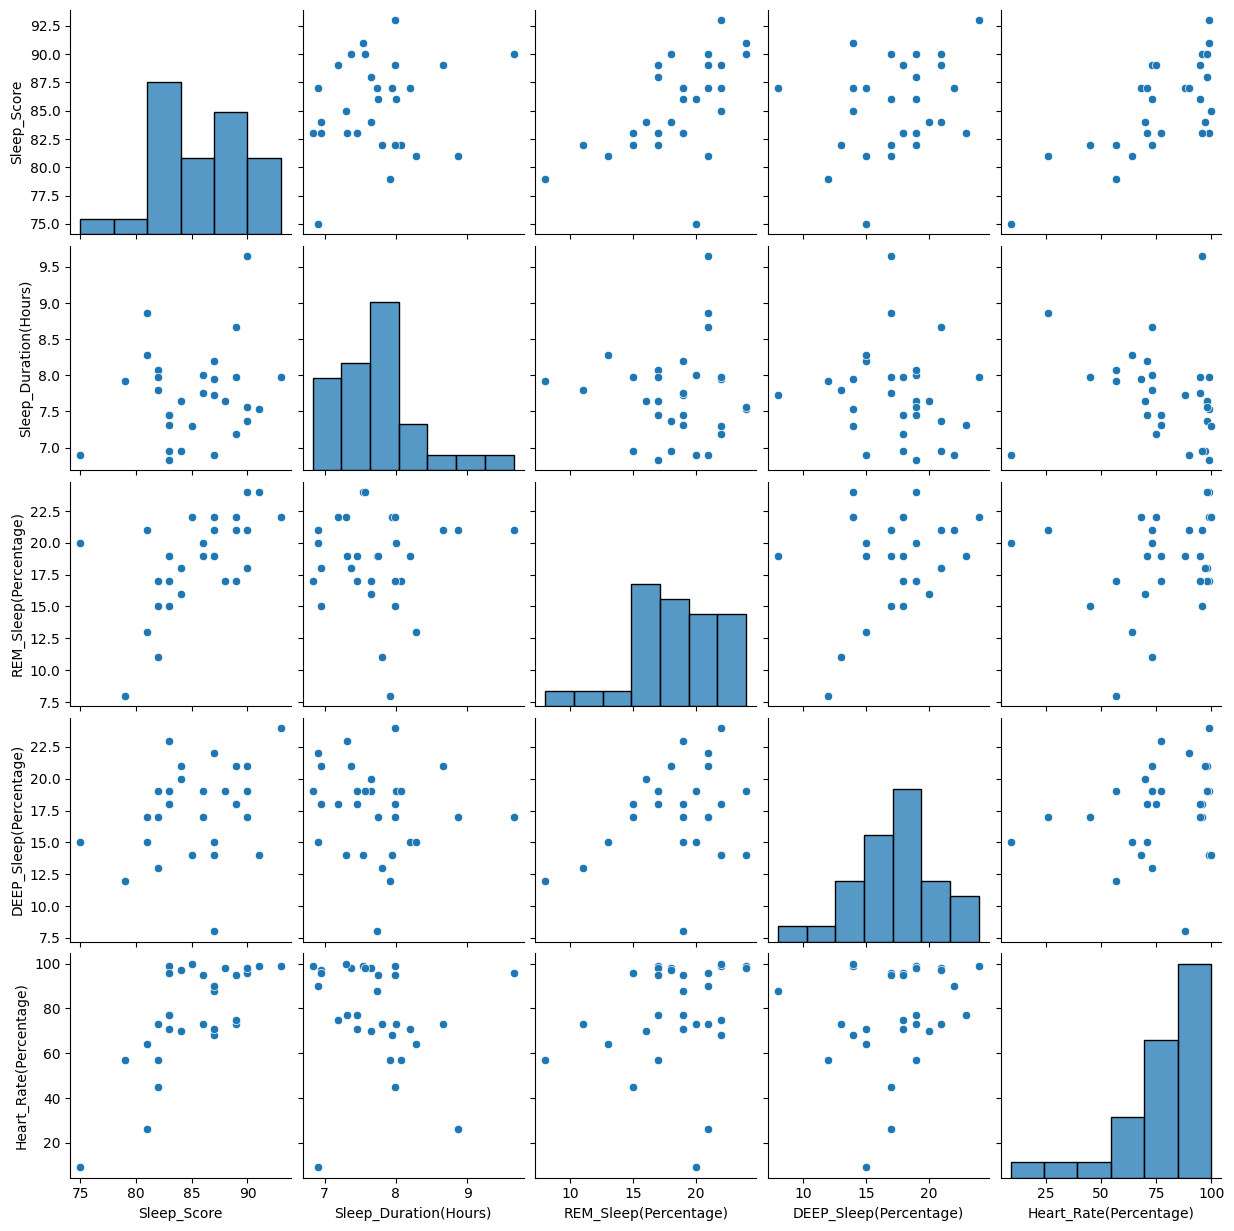

In [ ]:
num_col = data1.select_dtypes(include='number').columns

sns.pairplot(data1[num_col])
plt.show()

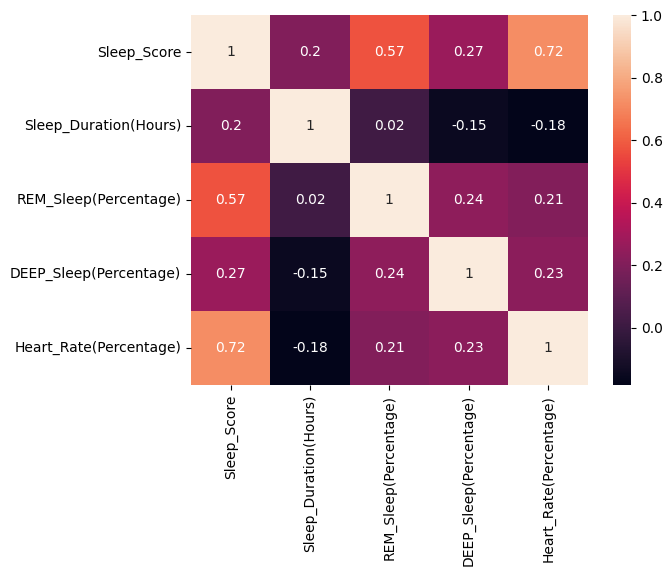

In [ ]:
corr = data1[num_col].corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# standarscaler
scaler = StandardScaler()
data1_copy = data1.copy()

data1_copy[num_col] = scaler.fit_transform(data1[num_col])

display(data1_copy.head(6))
display(data1_copy.info())

,Day_in_April,Date,Sleep_Score,Sleep_Duration(Hours),REM_Sleep(Percentage),DEEP_Sleep(Percentage),Heart_Rate(Percentage),start_datetime,end_datetime
0,Friday,2022-04-01,1.194701,-0.589164,-0.131214,1.018629,0.908939,2022-04-01 21:49:00,2022-04-02 06:01:00
1,Saturday,2022-04-02,0.940509,1.531826,0.712305,1.018629,-0.215986,2022-04-02 21:50:00,2022-04-03 07:26:00
2,Sunday,2022-04-03,-1.093024,1.858132,0.712305,-0.156712,-2.330844,2022-04-03 23:29:00,2022-04-04 09:54:00
3,Monday,2022-04-04,-0.584641,-1.459313,-0.412387,0.430959,0.953936,2022-04-04 22:12:00,2022-04-05 05:49:00
4,Tuesday,2022-04-05,-0.330449,-1.268968,-0.131214,1.018629,0.863942,2022-04-05 21:45:00,2022-04-06 05:43:00
5,Wednesday,2022-04-06,-0.584641,-0.453203,-0.412387,0.430959,-0.035998,2022-04-06 21:22:00,2022-04-07 06:14:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Day_in_April            30 non-null     object        
 1   Date                    30 non-null     datetime64[ns]
 2   Sleep_Score             30 non-null     float64       
 3   Sleep_Duration(Hours)   30 non-null     float64       
 4   REM_Sleep(Percentage)   30 non-null     float64       
 5   DEEP_Sleep(Percentage)  30 non-null     float64       
 6   Heart_Rate(Percentage)  30 non-null     float64       
 7   start_datetime          30 non-null     datetime64[ns]
 8   end_datetime            30 non-null     datetime64[ns]
dtypes: datetime64[ns](3), float64(5), object(1)
memory usage: 2.2+ KB


None

In [ ]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the data
principal_components = pca.fit_transform(data1_copy[num_col])

# Create a new DataFrame with the principal components
data1_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

data1_pca.head(10)

,PC1,PC2
0,1.519241,-0.783345
1,1.137008,1.333470
2,-1.654637,1.944969
3,0.110553,-1.805274
4,0.551434,-1.731324
5,-0.422165,-0.757076
6,0.136409,1.056839
7,-0.405405,-0.499885
8,-0.085665,1.126016
9,-0.323763,-1.606267


In [ ]:
pca = PCA(n_components=2)
pca.fit(data1_copy[num_col])
pca.explained_variance_ratio_

array([0.43680576, 0.23308377])

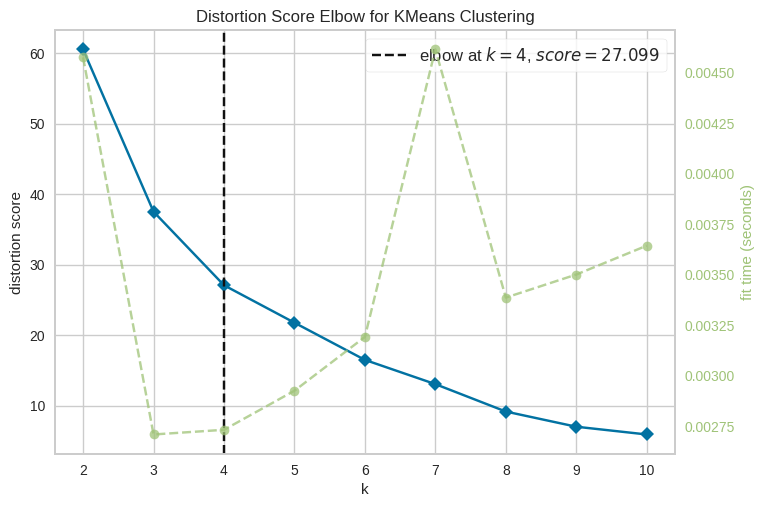

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Inisialisasi model KMeans
model_kmeans = KMeans(random_state=300)

# Menentukan rentang nilai k
visualizer = KElbowVisualizer(model_kmeans, k=(2, 11))

# Melakukan fitting model ke data
visualizer.fit(data1_pca)

# Menampilkan visualisasi Elbow Method
visualizer.show()

In [ ]:
# Membangun model menggunakan PCA

# Inisialisasi model KMeans dengan k=4 dan metrik Euclidean
model_kmeans = KMeans(n_clusters=3, random_state=300)

# Melakukan fitting model ke data
labels = model_kmeans.fit_predict(data1_pca)

# Menambahkan feature labels ke df_pca
data1_pca['Cluster'] = labels

data1_pca.head(10)

,PC1,PC2,Cluster
0,1.519241,-0.783345,0
1,1.137008,1.333470,1
2,-1.654637,1.944969,2
3,0.110553,-1.805274,0
4,0.551434,-1.731324,0
5,-0.422165,-0.757076,0
6,0.136409,1.056839,1
7,-0.405405,-0.499885,0
8,-0.085665,1.126016,1
9,-0.323763,-1.606267,0


In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(data1_pca.drop('Cluster', axis=1), data1_pca['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3506701934076128


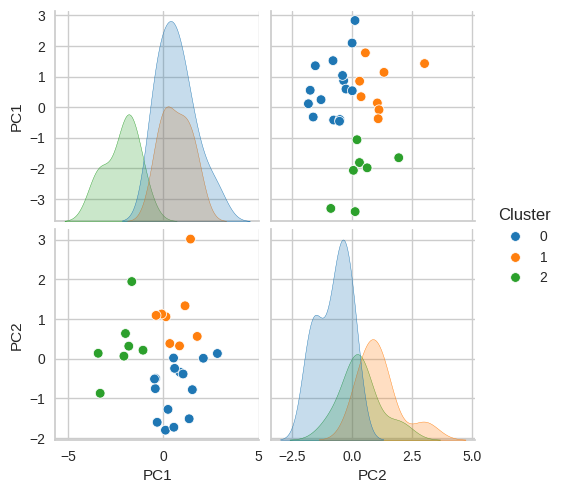

In [ ]:
sns.pairplot(data1_pca,hue='Cluster',diag_kind='kde',palette='tab10',dropna=True)

In [ ]:
data1['Target'] = data1_pca['Cluster']
data1.head(10)

,Day_in_April,Date,Sleep_Score,Sleep_Duration(Hours),REM_Sleep(Percentage),DEEP_Sleep(Percentage),Heart_Rate(Percentage),start_datetime,end_datetime,Target
0,Friday,2022-04-01,90,7.366667,18.0,21.0,98.0,2022-04-01 21:49:00,2022-04-02 06:01:00,0
1,Saturday,2022-04-02,89,8.666667,21.0,21.0,73.0,2022-04-02 21:50:00,2022-04-03 07:26:00,1
2,Sunday,2022-04-03,81,8.866667,21.0,17.0,26.0,2022-04-03 23:29:00,2022-04-04 09:54:00,2
3,Monday,2022-04-04,83,6.833333,17.0,19.0,99.0,2022-04-04 22:12:00,2022-04-05 05:49:00,0
4,Tuesday,2022-04-05,84,6.950000,18.0,21.0,97.0,2022-04-05 21:45:00,2022-04-06 05:43:00,0
5,Wednesday,2022-04-06,83,7.450000,17.0,19.0,77.0,2022-04-06 21:22:00,2022-04-07 06:14:00,0
6,Thursday,2022-04-07,87,7.950000,22.0,14.0,68.0,2022-04-07 22:05:00,2022-04-08 06:55:00,1
7,Friday,2022-04-08,83,7.450000,19.0,18.0,71.0,2022-04-08 21:42:00,2022-04-09 06:36:00,0
8,Saturday,2022-04-09,87,8.200000,19.0,15.0,71.0,2022-04-09 23:27:00,2022-04-10 08:36:00,1
9,Sunday,2022-04-10,83,6.950000,15.0,18.0,96.0,2022-04-10 00:53:00,2022-04-10 08:39:00,0


In [ ]:
col = num_col.to_list()
col.append('Target')
col

['Sleep_Score',
 'Sleep_Duration(Hours)',
 'REM_Sleep(Percentage)',
 'DEEP_Sleep(Percentage)',
 'Heart_Rate(Percentage)',
 'Target']

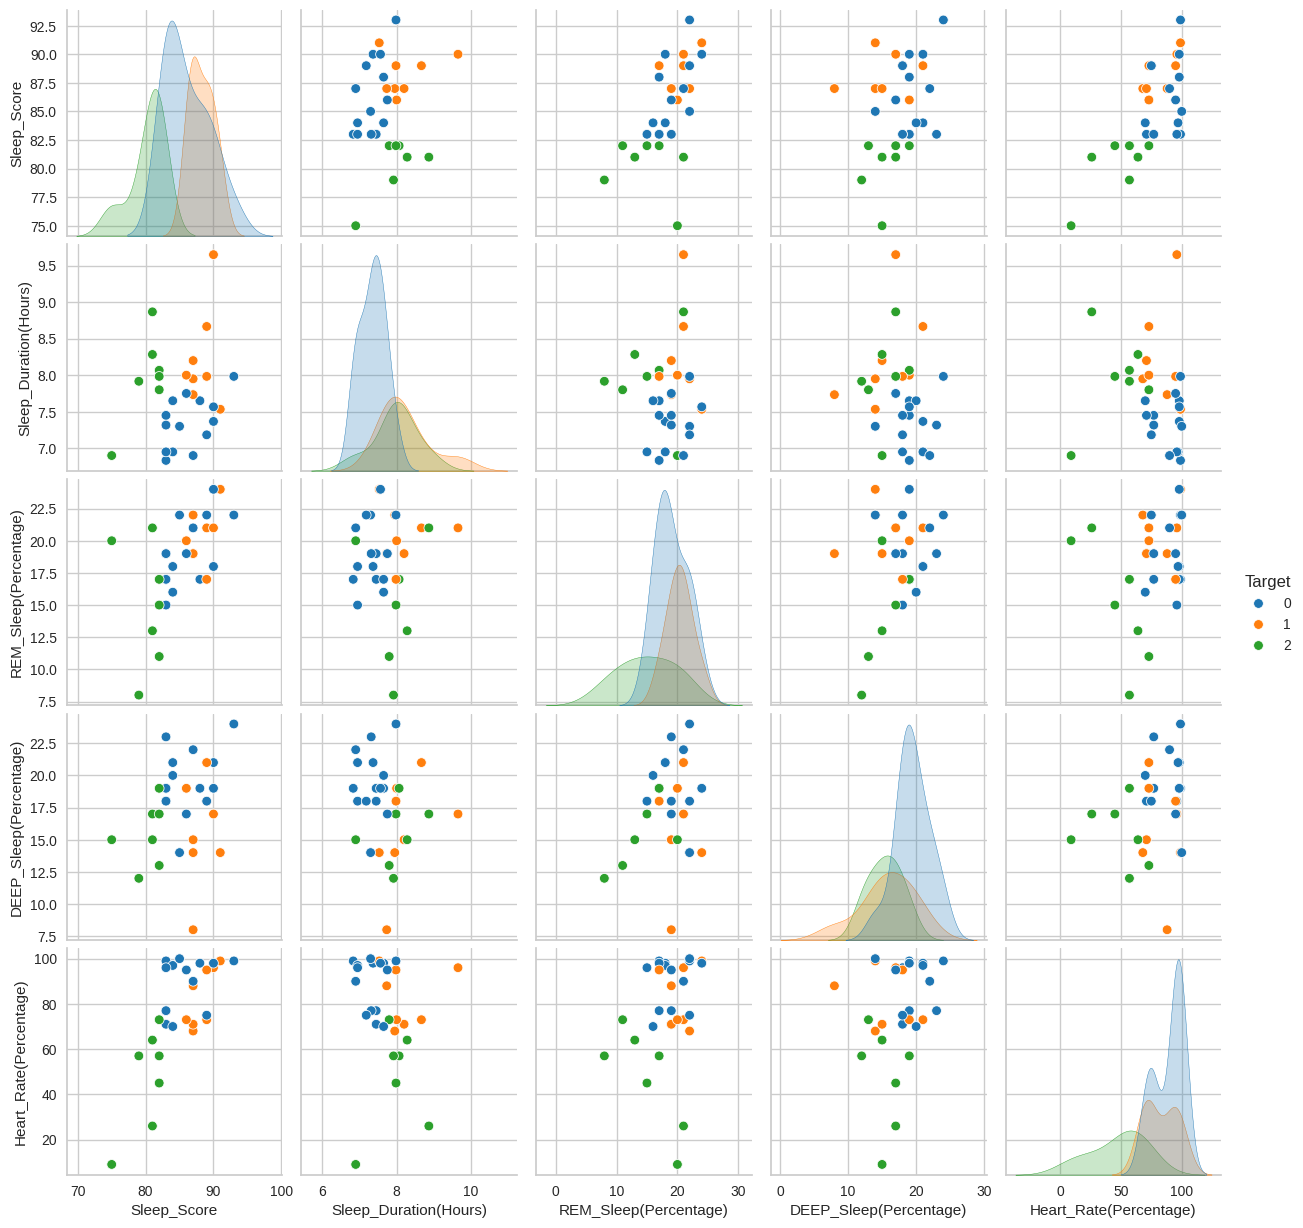

In [ ]:
sns.pairplot(data1[col],hue='Target',diag_kind='kde',palette='tab10',dropna=True)

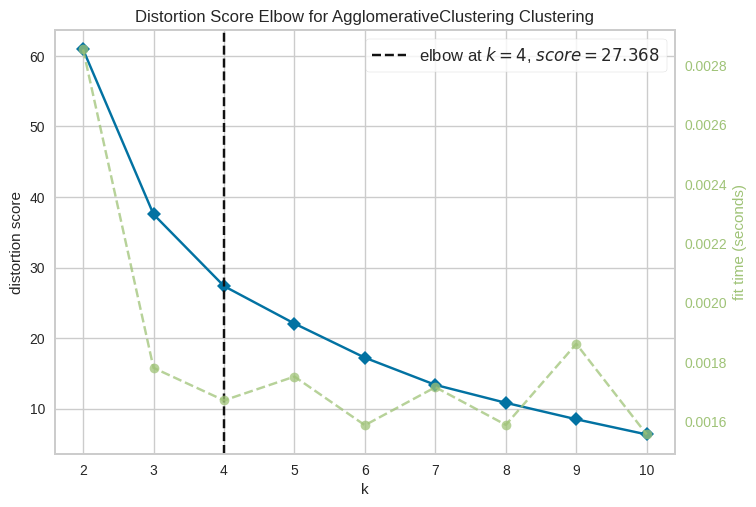

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Inisialisasi model KMeans
model_kmeans = AgglomerativeClustering()

# Menentukan rentang nilai k
visualizer = KElbowVisualizer(model_kmeans, k=(2, 11))

# Melakukan fitting model ke data
visualizer.fit(data1_pca)

# Menampilkan visualisasi Elbow Method
visualizer.show()

In [ ]:
# Membangun model menggunakan PCA

# Inisialisasi model KMeans dengan k=4 dan metrik Euclidean
model_kmeans = AgglomerativeClustering(n_clusters=3)

# Melakukan fitting model ke data
labels = model_kmeans.fit_predict(data1_pca)

# Menambahkan feature labels ke df_pca
data1_pca['Cluster'] = labels

data1_pca.head(10)

,PC1,PC2,Cluster
0,1.519241,-0.783345,0
1,1.137008,1.333470,2
2,-1.654637,1.944969,1
3,0.110553,-1.805274,0
4,0.551434,-1.731324,0
5,-0.422165,-0.757076,0
6,0.136409,1.056839,2
7,-0.405405,-0.499885,0
8,-0.085665,1.126016,2
9,-0.323763,-1.606267,0


In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(data1_pca.drop('Cluster', axis=1), data1_pca['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3506701934076128


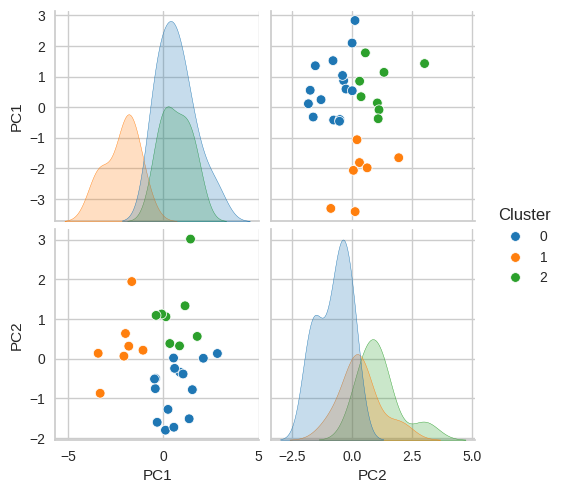

In [ ]:
sns.pairplot(data1_pca,hue='Cluster',diag_kind='kde',palette='tab10',dropna=True)

In [ ]:
data1['Target'] = data1_pca['Cluster']
data1.head(10)

,Day_in_April,Date,Sleep_Score,Sleep_Duration(Hours),REM_Sleep(Percentage),DEEP_Sleep(Percentage),Heart_Rate(Percentage),start_datetime,end_datetime,Target
0,Friday,2022-04-01,90,7.366667,18.0,21.0,98.0,2022-04-01 21:49:00,2022-04-02 06:01:00,0
1,Saturday,2022-04-02,89,8.666667,21.0,21.0,73.0,2022-04-02 21:50:00,2022-04-03 07:26:00,2
2,Sunday,2022-04-03,81,8.866667,21.0,17.0,26.0,2022-04-03 23:29:00,2022-04-04 09:54:00,1
3,Monday,2022-04-04,83,6.833333,17.0,19.0,99.0,2022-04-04 22:12:00,2022-04-05 05:49:00,0
4,Tuesday,2022-04-05,84,6.950000,18.0,21.0,97.0,2022-04-05 21:45:00,2022-04-06 05:43:00,0
5,Wednesday,2022-04-06,83,7.450000,17.0,19.0,77.0,2022-04-06 21:22:00,2022-04-07 06:14:00,0
6,Thursday,2022-04-07,87,7.950000,22.0,14.0,68.0,2022-04-07 22:05:00,2022-04-08 06:55:00,2
7,Friday,2022-04-08,83,7.450000,19.0,18.0,71.0,2022-04-08 21:42:00,2022-04-09 06:36:00,0
8,Saturday,2022-04-09,87,8.200000,19.0,15.0,71.0,2022-04-09 23:27:00,2022-04-10 08:36:00,2
9,Sunday,2022-04-10,83,6.950000,15.0,18.0,96.0,2022-04-10 00:53:00,2022-04-10 08:39:00,0


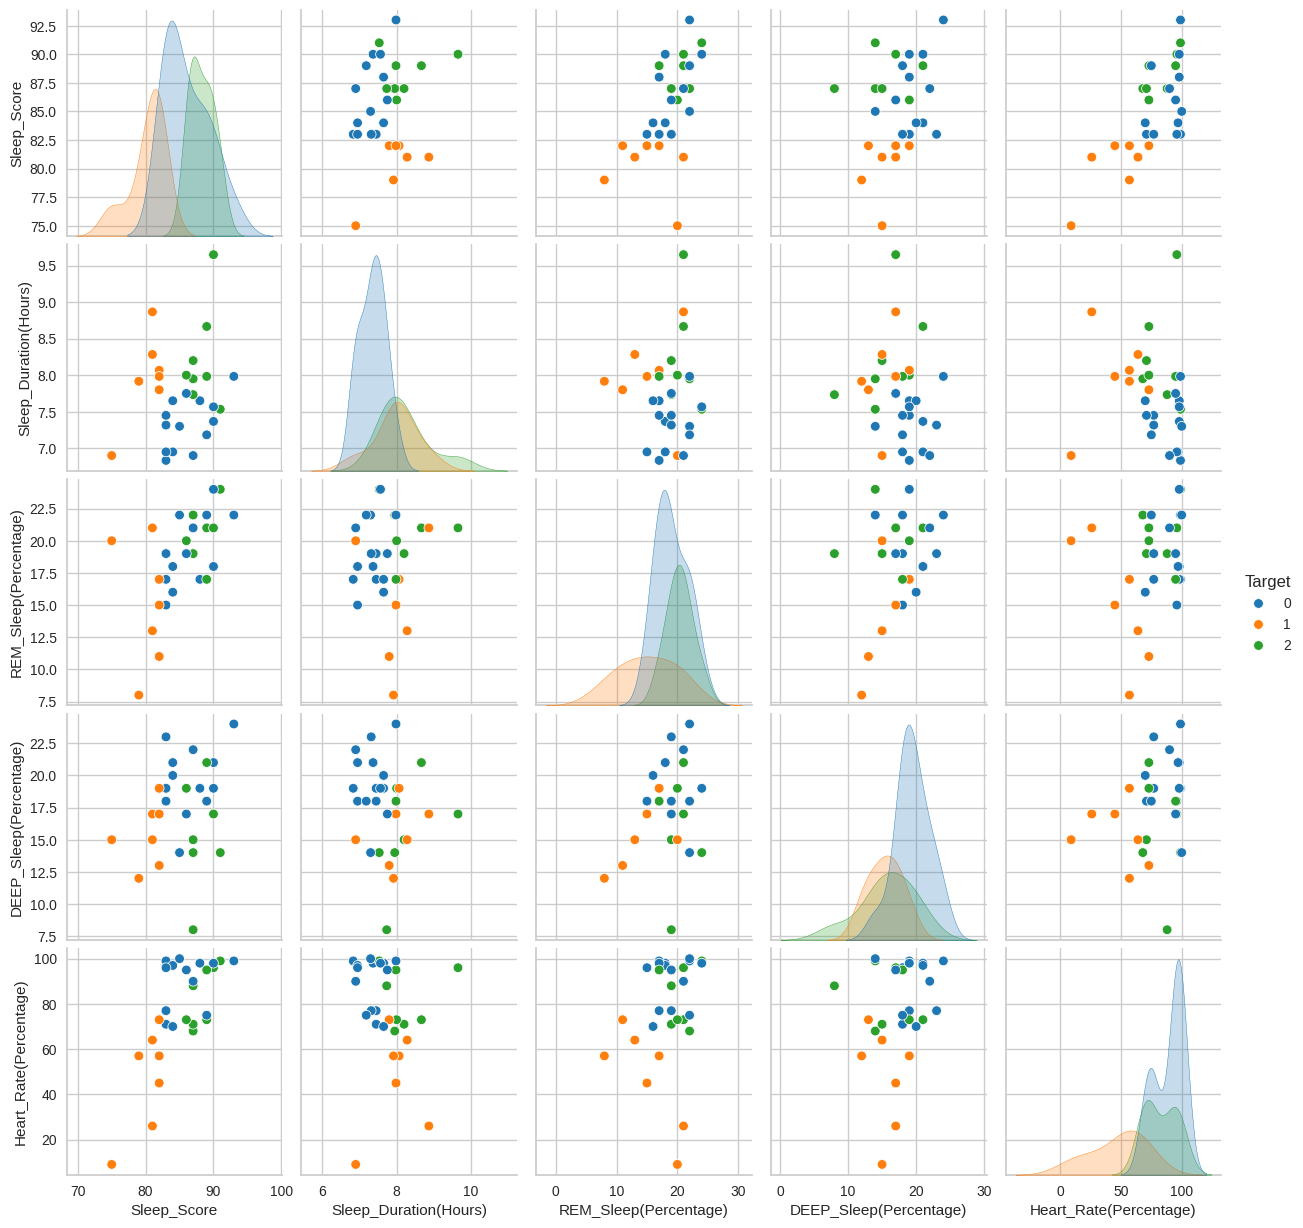

In [ ]:
sns.pairplot(data1[col],hue='Target',diag_kind='kde',palette='tab10',dropna=True)

In [ ]:
data2 = pd.read_csv('Sleep_Efficiency.csv',sep=';')
data2.head(6)

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,06/03/2021 01:00,06/03/2021 07:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,05/12/2021 02:00,05/12/2021 09:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,25/05/2021 21:30,25/05/2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,03/11/2021 02:30,03/11/2021 08:30,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,13/03/2021 01:00,13/03/2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
5,6,36,Female,01/07/2021 21:00,01/07/2021 04:30,7.5,0.90,28,60,17,0.0,NaN,0.0,No,1.0


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     436 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [ ]:
data2[['Bedtime','Wakeup time']] = data2[['Bedtime','Wakeup time']].apply(lambda x: pd.to_datetime(x, dayfirst=True))
display(data2.info())
display(data2.head(6))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      452 non-null    int64         
 1   Age                     452 non-null    int64         
 2   Gender                  452 non-null    object        
 3   Bedtime                 452 non-null    datetime64[ns]
 4   Wakeup time             452 non-null    datetime64[ns]
 5   Sleep duration          452 non-null    float64       
 6   Sleep efficiency        452 non-null    float64       
 7   REM sleep percentage    452 non-null    int64         
 8   Deep sleep percentage   452 non-null    int64         
 9   Light sleep percentage  452 non-null    int64         
 10  Awakenings              432 non-null    float64       
 11  Caffeine consumption    427 non-null    float64       
 12  Alcohol consumption     436 non-null    float64   

None

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
5,6,36,Female,2021-07-01 21:00:00,2021-07-01 04:30:00,7.5,0.90,28,60,17,0.0,NaN,0.0,No,1.0


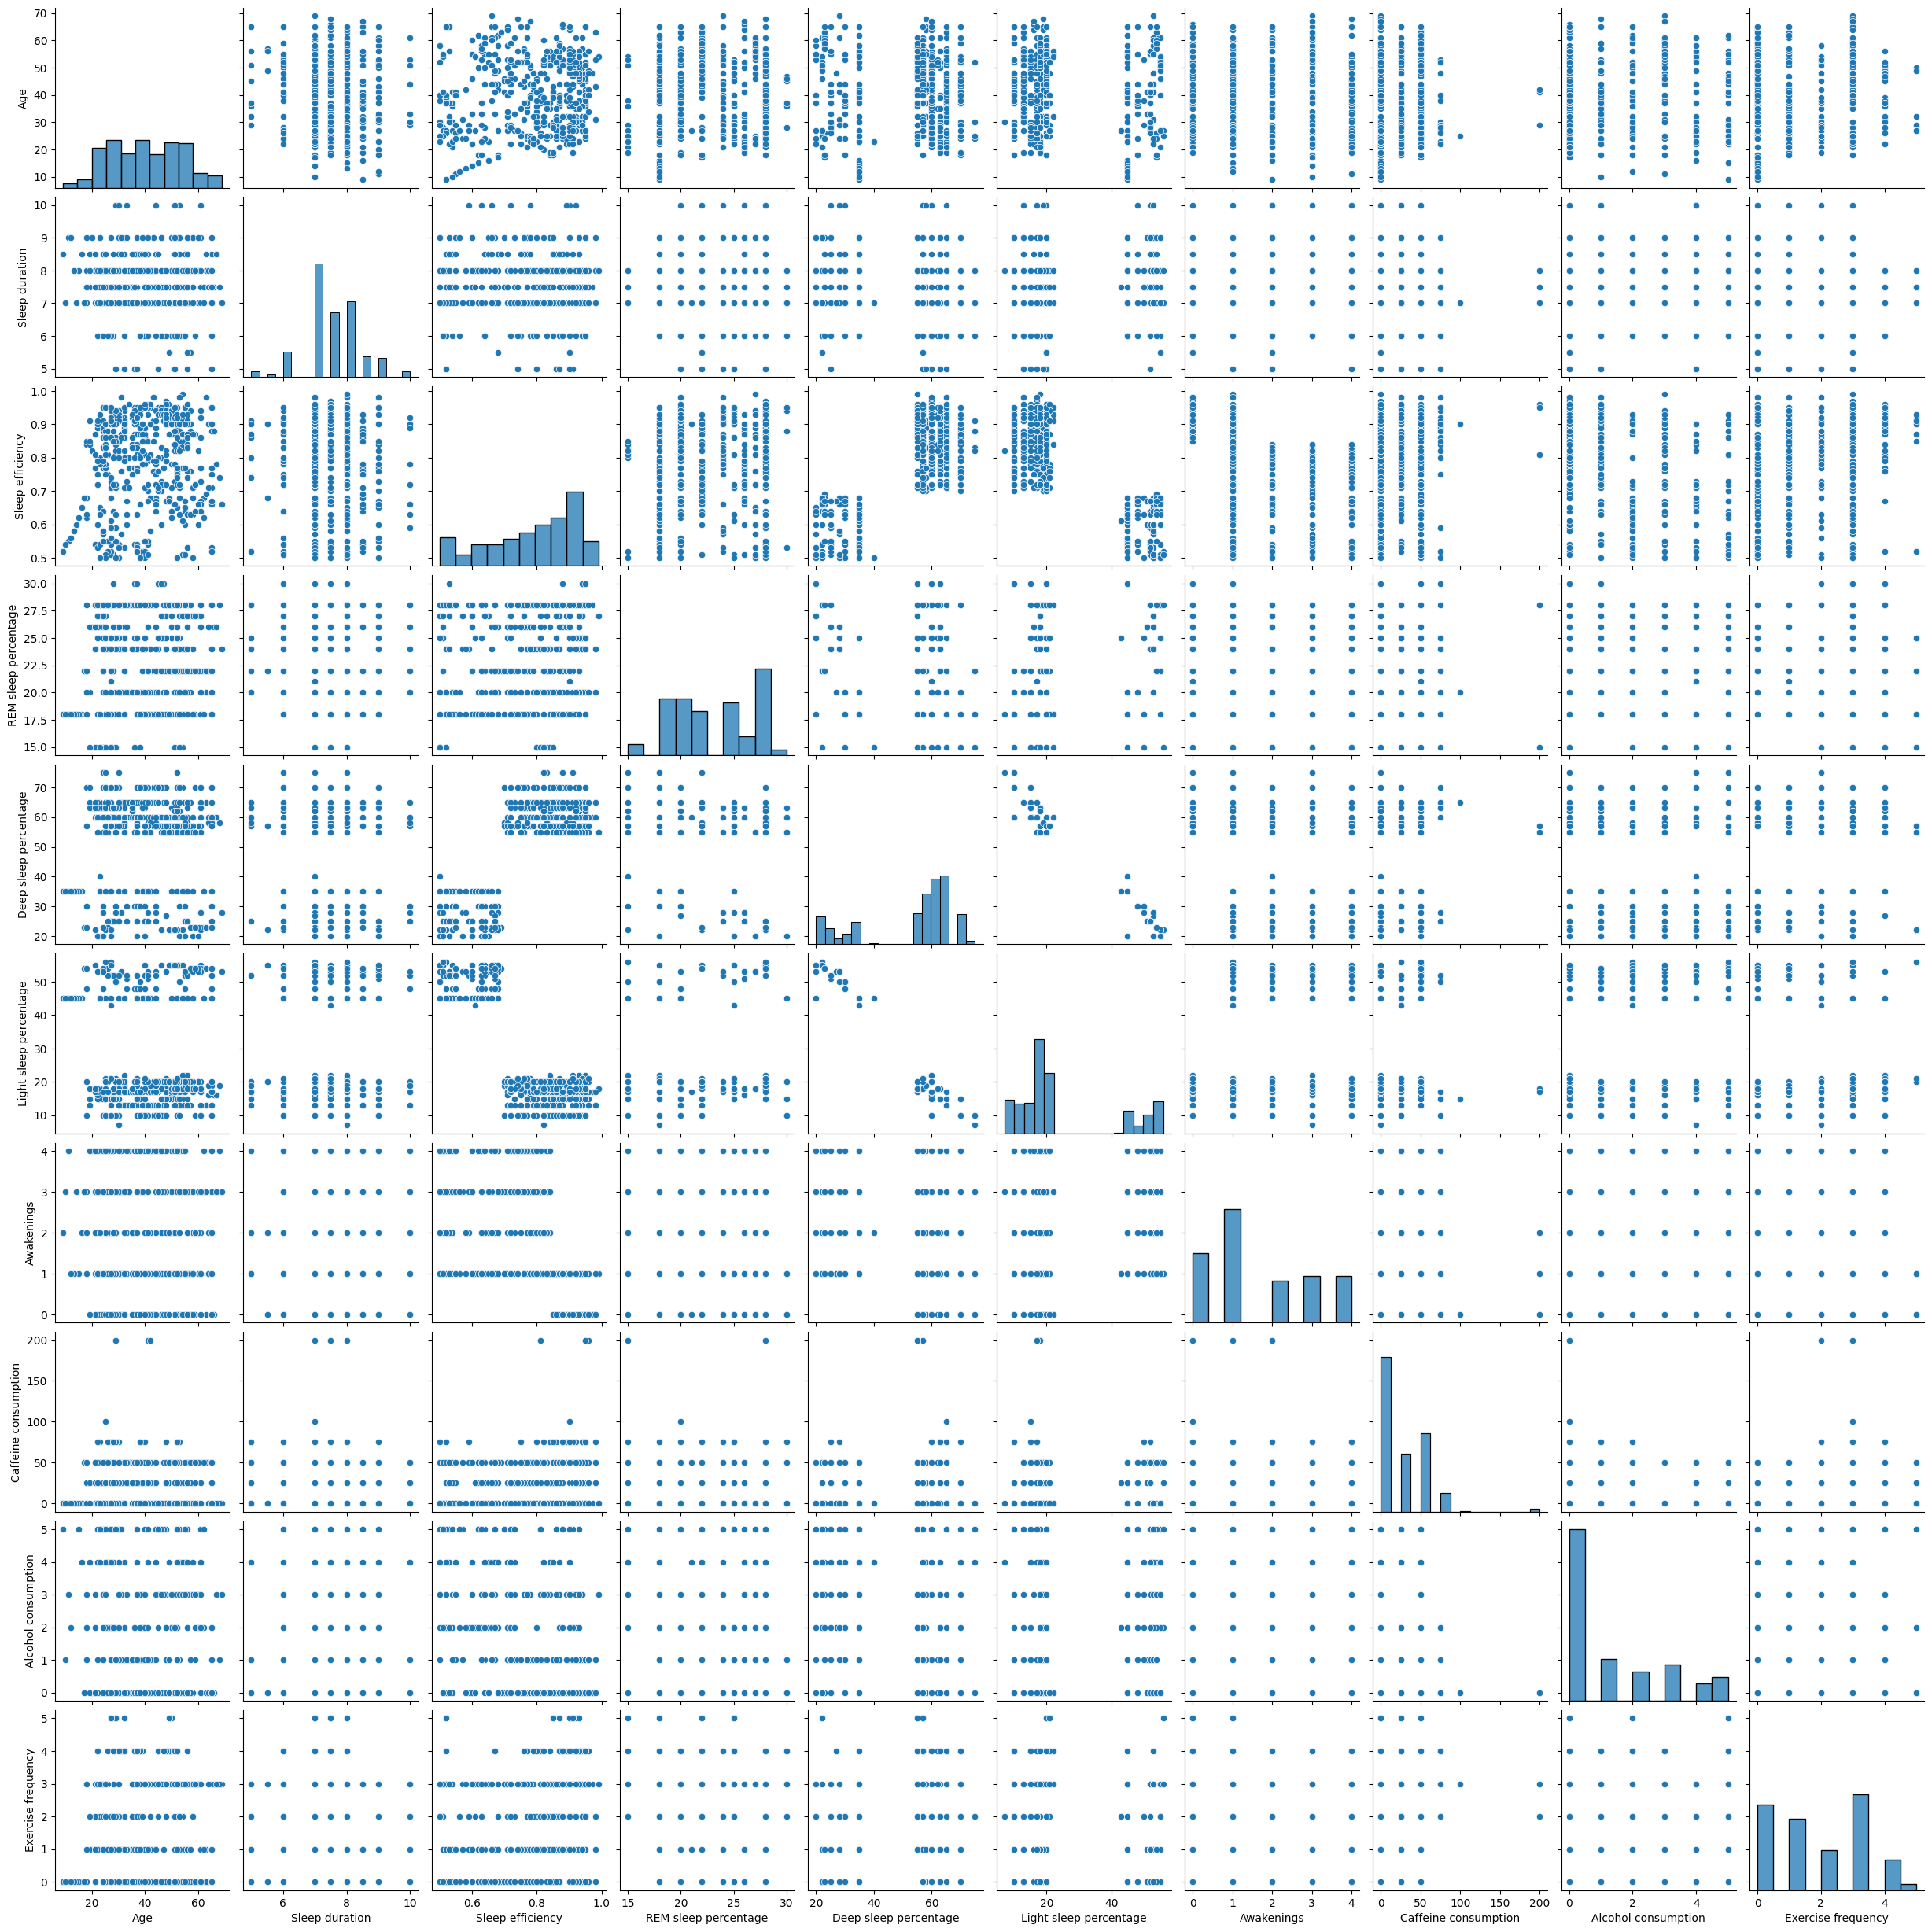

In [ ]:
col = ['Age','Sleep duration','Sleep efficiency','REM sleep percentage',
       'Deep sleep percentage','Light sleep percentage','Awakenings','Wakeup time',
       'Caffeine consumption','Alcohol consumption','Exercise frequency']

sns.pairplot(data2[col])
plt.show()

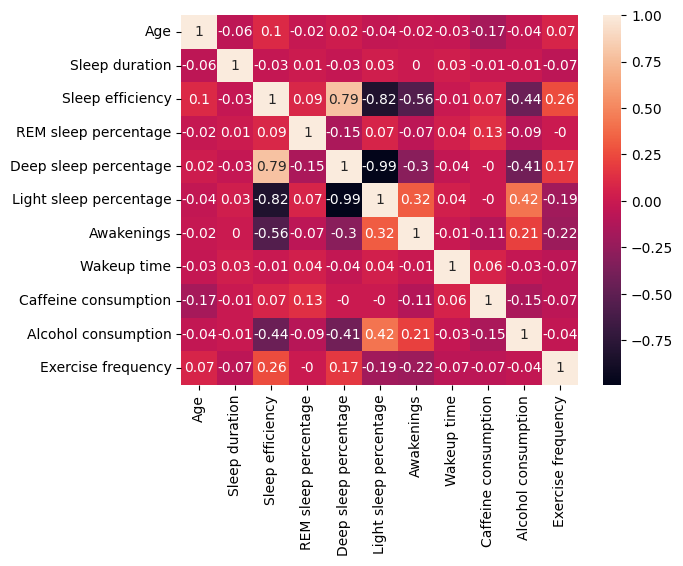

In [ ]:
corr = data2[col].corr()
sns.heatmap(corr.round(2), annot=True)
plt.show()

In [ ]:
data2.to_excel('Sleep_Efficiency.xlsx',index=False)

In [ ]:
data3 = pd.read_csv('student_sleep_patterns.csv')
data3.head(6)

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
5,6,25,Other,1st Year,4.9,12.0,3.2,3,96,9,9.80,18.83,5.04,10.51


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


In [ ]:
data3.head(6)

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01
5,6,25,Other,1st Year,4.9,12.0,3.2,3,96,9,9.80,18.83,5.04,10.51


In [ ]:
def convert_time_dtype(x):
  if x is np.nan :
    data_time = x
  else:
    # Ensure input is string
    x_str = str(x)

    # Split the string by ':'
    parts = x_str.split(':')

    # Check if there are exactly two parts (hour and minute)
    hour_str = parts[0]
    minute_str = parts[1]

    # Process the hour part
    if len(hour_str) < 2: # Check if it's a single digit
      hour_str_new = '0' + hour_str # Add leading zero
    else:
      hour_str_new = hour_str

    # Process the minute part
    minute = int(minute_str)
    if len(minute_str) == 2:
        if minute > 59:
            # Take the last digit as the new minute
            minute_str_new = '0' + minute_str[0]
        else:
            minute_str_new = minute_str
    elif len(minute_str) < 2:
        minute_str_new = '0' + minute_str # Add leading zero
    else:
        # Handle cases where the minute part is not a valid number
        minute_str_new = '00' # Or handle as needed, e.g., return original or NaN

    data_time = hour_str_new + ':' + minute_str_new

  return data_time

In [ ]:
import datetime as dt

 # Create a copy to avoid modifying the original dataframe

for i in ['Weekday_Sleep_Start','Weekend_Sleep_Start','Weekday_Sleep_End','Weekend_Sleep_End']:
  data3[i] = data3[i].astype(str).str.replace('.', ':')
  data3[i] = data3[i].apply(convert_time_dtype)

display(data3.head(6))
display(data3.info())

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14:16,04:05,07:41,07:06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,08:07,07:01,08:21,10:21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20:00,20:47,06:08,10:09
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19:08,04:08,06:06,09:42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20:09,06:12,08:09,09:01
5,6,25,Other,1st Year,4.9,12.0,3.2,3,96,9,09:08,18:08,05:04,10:51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    object 
 11  Weekend_Sleep_Start  500 non-null    object 
 12  Weekday_Sleep_End    500 non-null    object 
 13  Weekend_Sleep_End    500 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 54.8+ KB


None

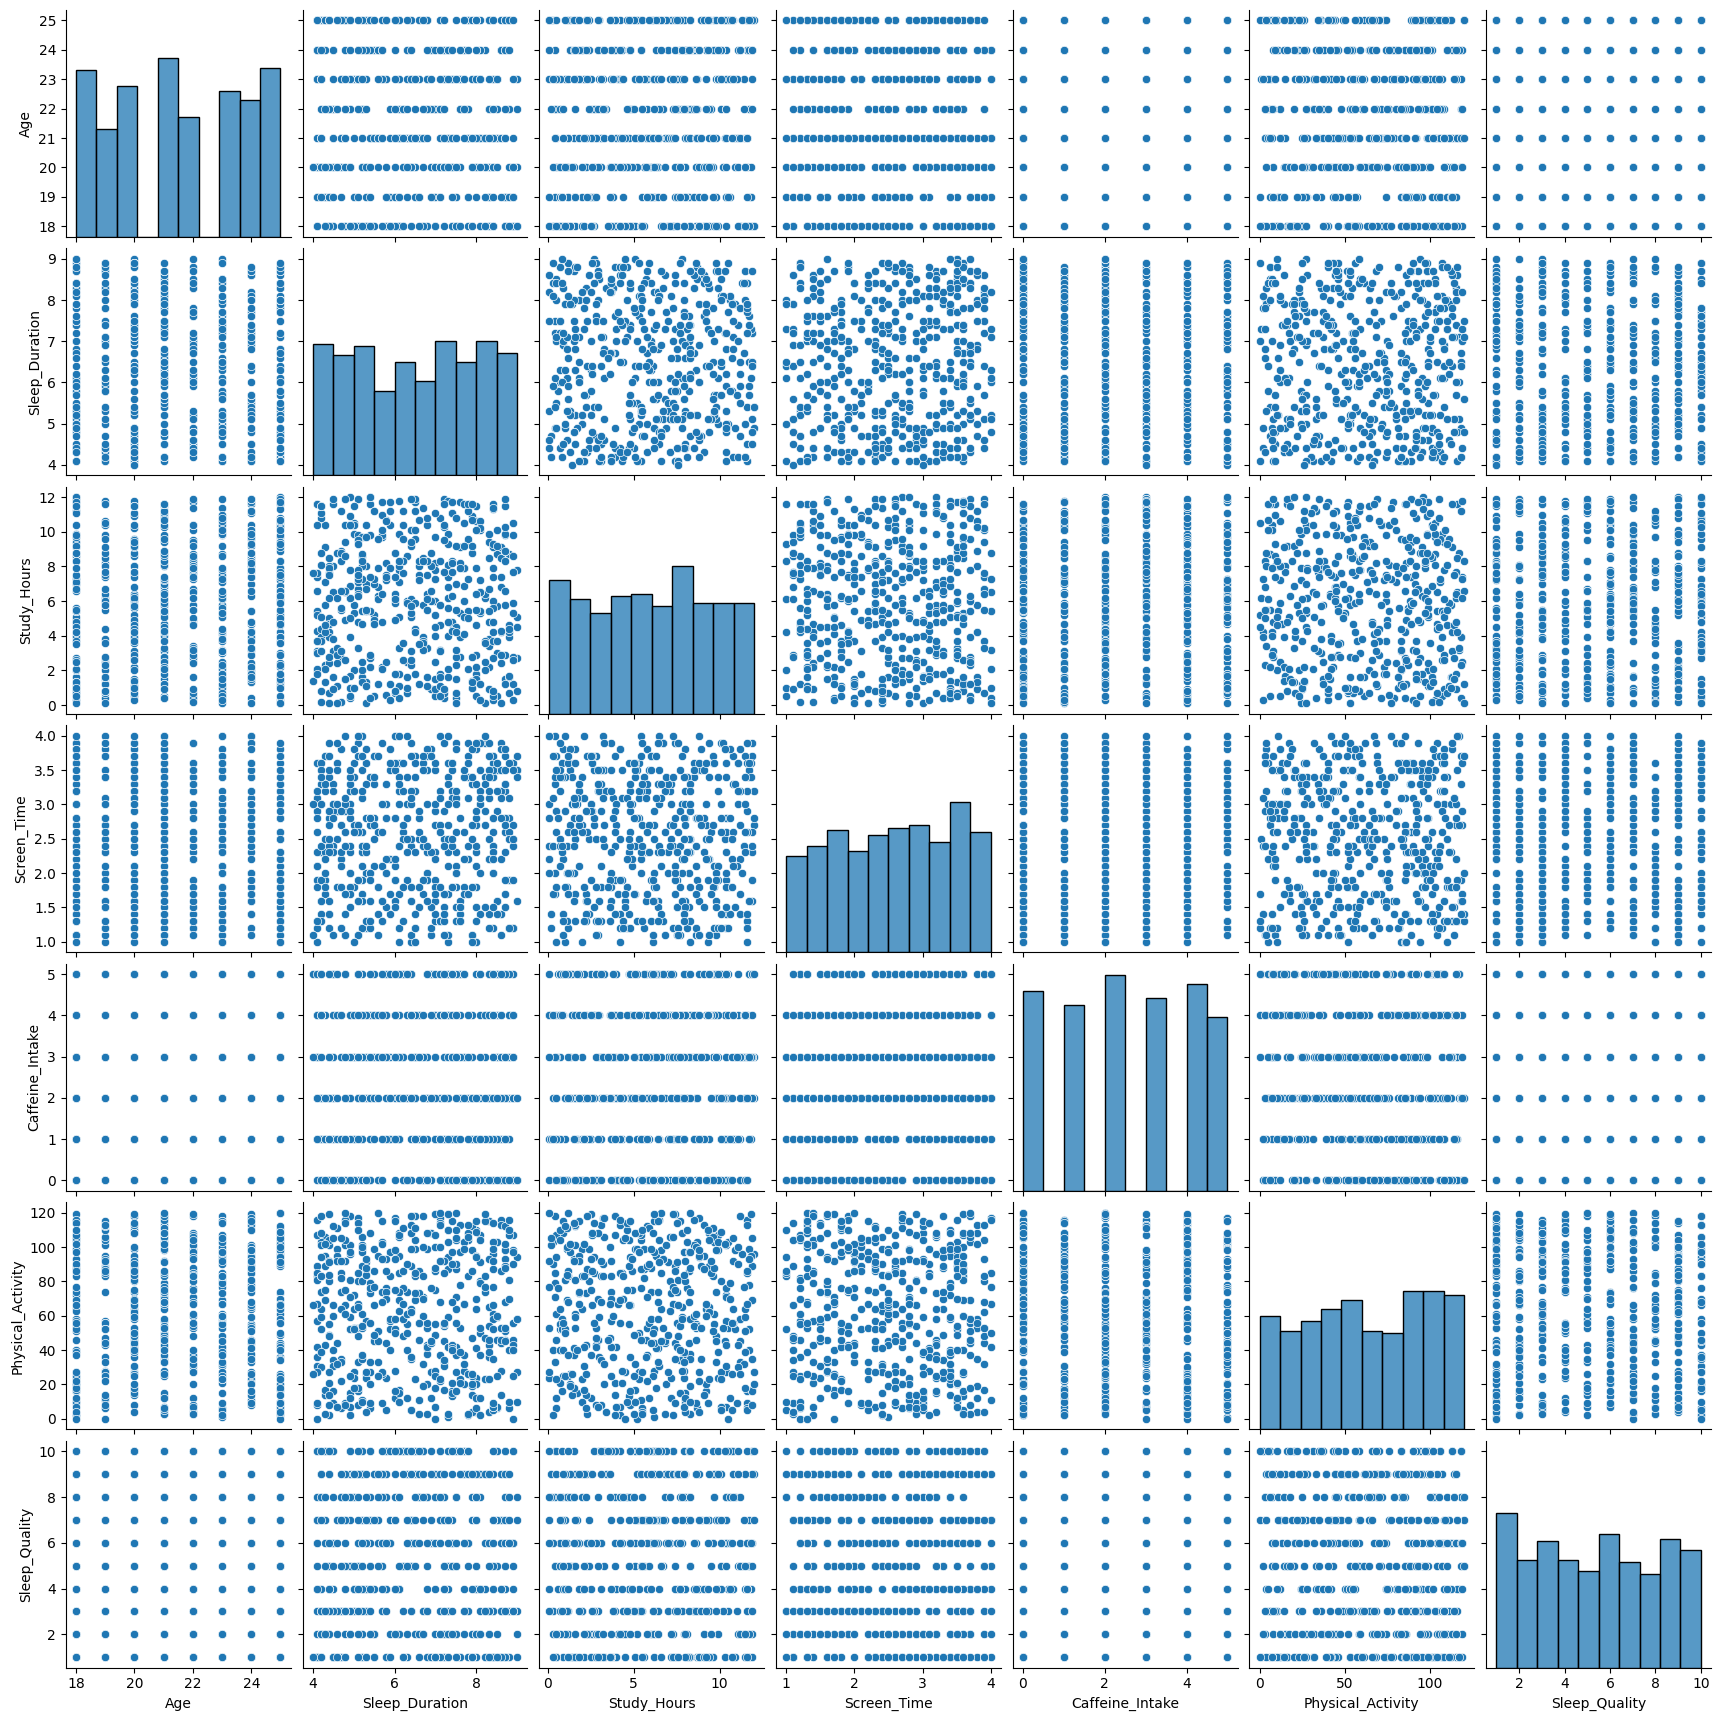

In [ ]:
col = ['Age','Sleep_Duration','Study_Hours','Screen_Time','Caffeine_Intake','Physical_Activity','Sleep_Quality']

sns.pairplot(data3[col])
plt.show()

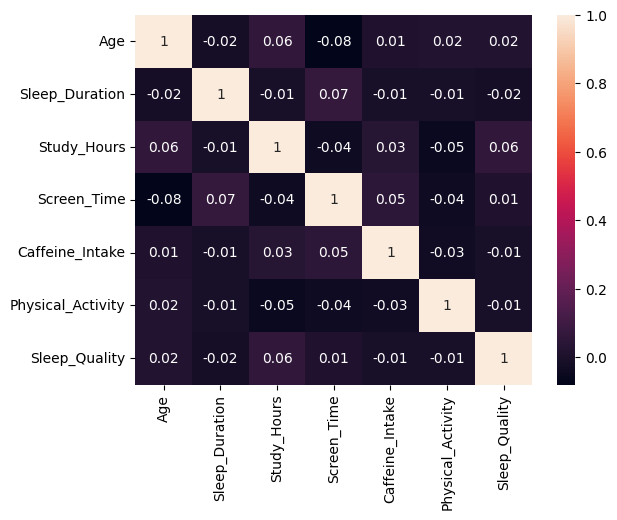

In [ ]:
corr = data3[col].corr()
sns.heatmap(corr.round(2), annot=True)
plt.show()

In [ ]:
data3.to_excel('student_sleep_patterns.xlsx',index=False)